# Imports

In [1]:
!pip install --upgrade plotly 


     |████████████████████████████████| 13.2MB 214kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

import seaborn as sns

import plotly
import plotly.express as px
import plotly.figure_factory as ff


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LayerNormalization, Dropout
from tensorflow.keras.regularizers import l2

In [4]:
data_path = '/content/drive/Shareddrives/BioML/Final Project/Data/healthcare-dataset-stroke-data.csv'
results_path = '/content/drive/Shareddrives/BioML/Final Project/Results'

In [5]:
def annotated_confusion_matrix(conf_matrix):
  fig = ff.create_annotated_heatmap(conf_matrix,
                                  x=['predicted: No stroke', 'predicted: Stroke'],
                                  y=['Real: No stroke', 'Real: Stroke'])
  fig['layout']['yaxis']['autorange'] = "reversed"
  fig.show()

# Load data

In [6]:
raw_data = pd.read_csv(data_path)

In [7]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Visualize data

##Numerical data

In [9]:
numerical_cols = ['age', 'avg_glucose_level','bmi']


###Age 

We wanted to see the distribution of ages on our dataset. Notice that we have data for a wide range of ages, from kids to elder people, this way we would be able to see also which range of year is more likely to have a stroke. 

In [10]:
fig = px.histogram(raw_data[numerical_cols[0]],
                   title='Age count of the dataset',
                   x='age',
                   labels={
                       "age" : "Age"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()

### Average glucose level

From our own blood tests, we have seen that the normal values for this molecule are between 74-110mg/dL, which can be seen in this distribution.

In [11]:
fig = px.histogram(raw_data[numerical_cols[1]],
                   title='Average glucose level of the dataset',
                   x='avg_glucose_level',
                   labels={
                       "avg_glucose_level" : "Average glucose level"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()

###BMI

In [12]:
fig = px.histogram(raw_data[numerical_cols[2]],
                   title='BMI of the dataset',
                   x='bmi',
                   labels={
                       "bmi" : "BMI"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()


## Categorical data

In [13]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','smoking_status', 'stroke']

### Gender

In [14]:
fig = px.histogram(raw_data[categorical_cols[0]],
                   title='Gender of the dataset',
                   x='gender',
                   labels={
                       "gender" : "Gender"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()

###Hypertension

In terms of heart diseases or hypertension, we can see that most of our patients are “healthy”.

In [15]:
fig = px.histogram(raw_data[categorical_cols[1]],
                   title='Hypertension in the dataset',
                   labels={
                       "hypertension" : "Hypertension"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

###Heart disease

In [16]:
fig = px.histogram(raw_data[categorical_cols[2]],
                   title='Heart disease in the dataset',
                   labels={
                       "heart_disease" : "Heart disease"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

###Marriage

In [17]:
fig = px.histogram(raw_data[categorical_cols[3]],
                   title='Marriage in the dataset',
                   labels={
                       "value" : "Married"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

###Work

In [18]:
fig = px.histogram(raw_data[categorical_cols[4]],
                   title='Work in the dataset',
                   labels={
                       "value" : "Work type"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()

###Residence type

In [19]:
fig = px.histogram(raw_data[categorical_cols[5]],
                   title='Residence in the dataset',
                   labels={
                       "value" : "Residence type"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

###Smokers

In [20]:
fig = px.histogram(raw_data[categorical_cols[6]],
                   title='Smokers in the dataset',
                   labels={
                       "value" : "Smoking status"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

###Strokes

In [21]:
fig = px.histogram(raw_data[categorical_cols[7]],
                   title='Strokes in the dataset',
                   labels={
                       "value" : "Stroke history"
                   })
fig.update_layout(yaxis_title='Count',
                  showlegend=False)
fig.show()

From this visualization before processing, we can see that the dataset is unbalanced regarding the strokes.

Now we also want to see some characteristics of those people that have stroke=1.

In [22]:
people_with_stroke = raw_data[raw_data["stroke"]==1]

In [23]:
people_with_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


Gender distribution of people with stroke

In [24]:
gender_stroke = people_with_stroke.groupby(["gender"]).id.count()
gender_stroke

gender
Female    141
Male      108
Name: id, dtype: int64

Now we are going to see the gaes of people with stroke

In [25]:
fig = px.histogram(people_with_stroke["age"],
                   title='Age count of the stroke dataset',
                   x='age',
                   labels={
                       "age" : "Age"
                   })
fig.update_layout(yaxis_title='Count')
fig.show()

Notice that mostly people +70 are the most common age range. Also there is a peak around 80 and then decreases probably because of the average years of life.


In [26]:
work_stroke = people_with_stroke.groupby(["work_type"]).id.count()
work_stroke

work_type
Govt_job          33
Private          149
Self-employed     65
children           2
Name: id, dtype: int64

In [27]:
glucose_stroke = people_with_stroke.avg_glucose_level.mean()
glucose_stroke

132.54473895582322

In [28]:
smoke_stroke = people_with_stroke.groupby(["smoking_status"]).id.count()
smoke_stroke

smoking_status
Unknown            47
formerly smoked    70
never smoked       90
smokes             42
Name: id, dtype: int64

In [29]:
tension_stroke = people_with_stroke.groupby(["hypertension"]).id.count()
tension_stroke

hypertension
0    183
1     66
Name: id, dtype: int64

In [30]:
heart_stroke = people_with_stroke.groupby(["heart_disease"]).id.count()
heart_stroke

heart_disease
0    202
1     47
Name: id, dtype: int64

# Preprocessing

In [31]:
data_clean = raw_data.fillna(raw_data.bmi.mean())

In [32]:
data_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [33]:
num_nostrokes=data_clean.groupby('stroke').count().iloc[0,1]
num_strokes=data_clean.groupby('stroke').count().iloc[1,1]

In [34]:
data_clean.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [35]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [36]:
data_clean.shape

(5110, 12)

In [37]:
work_types = data_clean.work_type.unique()
residence_type = data_clean.Residence_type.unique()
smoking = data_clean.smoking_status.unique()


In [38]:
encoder_gender = {
    "gender" :{
        "Male" : 1,
        "Female" : 0,
        "Other": 2
    }
}

data_clean.replace(encoder_gender,inplace=True)

encoder_married = {
    "ever_married" : {
        "Yes" : 1,
        "No" : 0
    }
}

data_clean.replace(encoder_married,inplace=True)

encoder_work = {"work_type" : {work_types[i] : i for i in range(len(work_types))}}
data_clean.replace(encoder_work, inplace=True)

encoder_residence = {"Residence_type" : {residence_type[i] : i for i in range(len(residence_type))}}
data_clean.replace(encoder_residence, inplace=True)

encoder_smoking = {"smoking_status" : {smoking[i] : i for i in range(len(smoking))}}
data_clean.replace(encoder_smoking, inplace=True)


In [39]:
data_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.600000,0,1
1,51676,0,61.0,0,0,1,1,1,202.21,28.893237,1,1
2,31112,1,80.0,0,1,1,0,1,105.92,32.500000,1,1
3,60182,0,49.0,0,0,1,0,0,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,1,1,174.12,24.000000,1,1


## Standardize data

In [40]:
col_standarize = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
standard_data = data_clean.copy()
for col in col_standarize:
  scaler.fit(data_clean[col].to_numpy().reshape(-1,1))
  standard_data[col] = scaler.transform(data_clean[col].to_numpy().reshape(-1,1))

In [41]:
standard_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,0,1,1,0,0,2.706375,1.001234e+00,0,1
1,51676,0,0.786070,0,0,1,1,1,2.121559,1.384666e-15,1,1
2,31112,1,1.626390,0,1,1,0,1,-0.005028,4.685773e-01,1,1
3,60182,0,0.255342,0,0,1,0,0,1.437358,7.154182e-01,2,1
4,1665,0,1.582163,1,0,1,1,1,1.501184,-6.357112e-01,1,1


In [42]:
X = standard_data.iloc[:,:-1]
y = standard_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
standard_data.corr()['stroke']

id                   0.006388
gender               0.008929
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
work_type           -0.058224
Residence_type      -0.015458
avg_glucose_level    0.131945
bmi                  0.038947
smoking_status      -0.066393
stroke               1.000000
Name: stroke, dtype: float64

In [44]:
import plotly.express as px

fig = px.imshow(standard_data.corr()) #, labels=standard_data.columns)

fig.show()

First of all, let's start by seeing the performance of some models without parameter tuning nor feature selection.

##Balancing the data

In [45]:
nostrokes_data = standard_data[standard_data.stroke == 0]
strokes_data = standard_data[standard_data.stroke == 1]
nostrokes_data_undersampled = nostrokes_data.sample(n=num_strokes)

Balanced_data = pd.concat([nostrokes_data_undersampled, strokes_data])

X_balanced = Balanced_data.iloc[:,:-1]
y_balanced = Balanced_data.iloc[:,-1]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Models without parameters tuning nor feature selection

## Ensemble method: Random Forest 

---



### Unbalanced

In [46]:
X = standard_data.iloc[:,:-1]
y = standard_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
# scores = cross_val_score(clf, X, y, cv=5)
# scores.mean()
y_pred = cross_val_predict(clf,X, y, cv=5)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y,y_pred),
                                   recall_score(y, y_pred),
                                   precision_score(y, y_pred)))

Accuracy score: 0.9487279843444227
Recall score: 0.012048192771084338
Precision score: 0.15789473684210525


In [47]:
############# CONFUSION MATRIX
conf_matrix=confusion_matrix(y,y_pred)
annotated_confusion_matrix(conf_matrix)


The low Recall score in our previous prediction is due to an unbalance in the
data. Thus, we need to balance our dataset, we'll do so by getting a random
sample so that we have the same amount of data for positive strokes and 
negative strokes.


### Balanced

In [49]:
clf = RandomForestClassifier(n_estimators=10,
                             max_depth=None,
                             min_samples_split=2,
                             random_state=0)

y_pred = cross_val_predict(clf,X_balanced, y_balanced, cv=5)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y_balanced,y_pred),
                                   recall_score(y_balanced, y_pred),
                                   precision_score(y_balanced, y_pred)))

Accuracy score: 0.7369477911646586
Recall score: 0.7349397590361446
Precision score: 0.7379032258064516


In [50]:
conf_matrix=confusion_matrix(y_balanced,y_pred)
annotated_confusion_matrix(conf_matrix)

## SVM with cross-validation
---

### Unbalanced

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

model = SVC(kernel='poly')
kf = KFold(n_splits=10, shuffle=True)
y_pred = cross_val_predict(model, X, y, cv=kf)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y,y_pred),
                                   recall_score(y, y_pred),
                                   precision_score(y, y_pred)))

Accuracy score: 0.9512720156555773
Recall score: 0.0
Precision score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [52]:
conf_matrix=confusion_matrix(y,y_pred)
annotated_confusion_matrix(conf_matrix)

### Balanced

In [53]:
model = SVC(kernel='poly')
kf = KFold(n_splits=10, shuffle=True)
y_pred = cross_val_predict(model, X_balanced, y_balanced, cv=kf)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y_balanced,y_pred),
                                   recall_score(y_balanced, y_pred),
                                   precision_score(y_balanced, y_pred)))

Accuracy score: 0.4538152610441767
Recall score: 0.4738955823293173
Precision score: 0.4555984555984556


In [54]:
conf_matrix=confusion_matrix(y_balanced,y_pred)
annotated_confusion_matrix(conf_matrix)

## ANN

### Unbalanced

In [55]:
model = Sequential(
    [LayerNormalization(),
    Dense(11, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

In [56]:
epochs=10

hist=model.fit(X_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
28/28 [==============================] - 2s 2ms/step - loss: 0.4531 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9553 - recall: 0.0000e+00 - precision: 0.0000e+00

In [57]:
history = pd.DataFrame(
    {
        'epoch' : np.linspace(1,10,num=epochs),
        'loss' : hist.history['loss']
    }
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 11)                22        
_________________________________________________________________
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [58]:
fig = px.line(history,x='epoch', y='loss', title='Loss over epochs')
fig.show()

In [59]:
hist = model.evaluate(X_test, y_test, batch_size=64, verbose=2)

24/24 - 0s - loss: 0.2231 - accuracy: 0.9419 - recall: 0.0000e+00 - precision: 0.0000e+00


In [60]:
y_pred = np.argmax(model.predict(X_test, batch_size=64), axis=-1)
conf_matrix=confusion_matrix(y_test,y_pred)
annotated_confusion_matrix(conf_matrix)

In [61]:
X_test_balanced

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
238,1836,0,0.343796,1,0,1,0,0,-0.396379,-6.407951e-02,1
1812,12366,0,-0.363842,0,0,0,0,0,-0.189219,-5.967363e-01,3
3048,65116,0,0.830297,1,0,1,1,0,-0.670677,1.384666e-15,2
3559,32103,1,0.697615,0,0,1,1,0,-0.654555,1.178033e-01,1
4049,70106,0,0.918752,0,1,1,0,1,0.189101,2.217363e-01,1
...,...,...,...,...,...,...,...,...,...,...,...
1534,71322,0,-0.231159,0,0,1,0,1,1.988826,5.075521e-01,1
4393,63804,0,-0.717660,0,0,0,0,1,-1.109069,-1.116401e+00,2
1570,43271,0,-0.850343,0,0,0,2,0,-0.944092,-1.116401e+00,2
668,68995,0,0.211114,1,0,0,0,1,0.264853,1.384666e-15,0


### Balanced

In [62]:
model = Sequential(
    [LayerNormalization(),
    Dense(11, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

In [63]:
epochs=10

hist=model.fit(X_train_balanced, y_train_balanced, epochs=epochs, batch_size=64)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.7131 - accuracy: 0.5086 - recall: 1.0000 - precision: 0.5086
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5086 - recall: 1.0000 - precision: 0.5086
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5086 - recall: 1.0000 - precision: 0.5086
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5086 - recall: 1.0000 - precision: 0.5086
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4799 - recall: 0.3503 - precision: 0.4844
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4914 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4914 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 8/10
6/6 [==============================] - 0s 

In [64]:
history = pd.DataFrame(
    {
        'epoch' : np.linspace(1,epochs,num=epochs),
        'loss' : hist.history['loss']
    }
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_1 (Layer (None, 11)                22        
_________________________________________________________________
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [65]:
fig = px.line(history,x='epoch', y='loss', title='Loss over epochs')
fig.show()

In [66]:
hist = model.evaluate(X_test_balanced, y_test_balanced, batch_size=64, verbose=2)

3/3 - 0s - loss: 0.6939 - accuracy: 0.4800 - recall: 1.0000 - precision: 0.4800


In [67]:
y_pred = np.argmax(model.predict(X_test_balanced, batch_size=64), axis=-1)
conf_matrix=confusion_matrix(y_test_balanced,y_pred)
annotated_confusion_matrix(conf_matrix)

# Feature selection & parameters tuning

Now we are going to perform a pca and plot the explained variance of all the components.

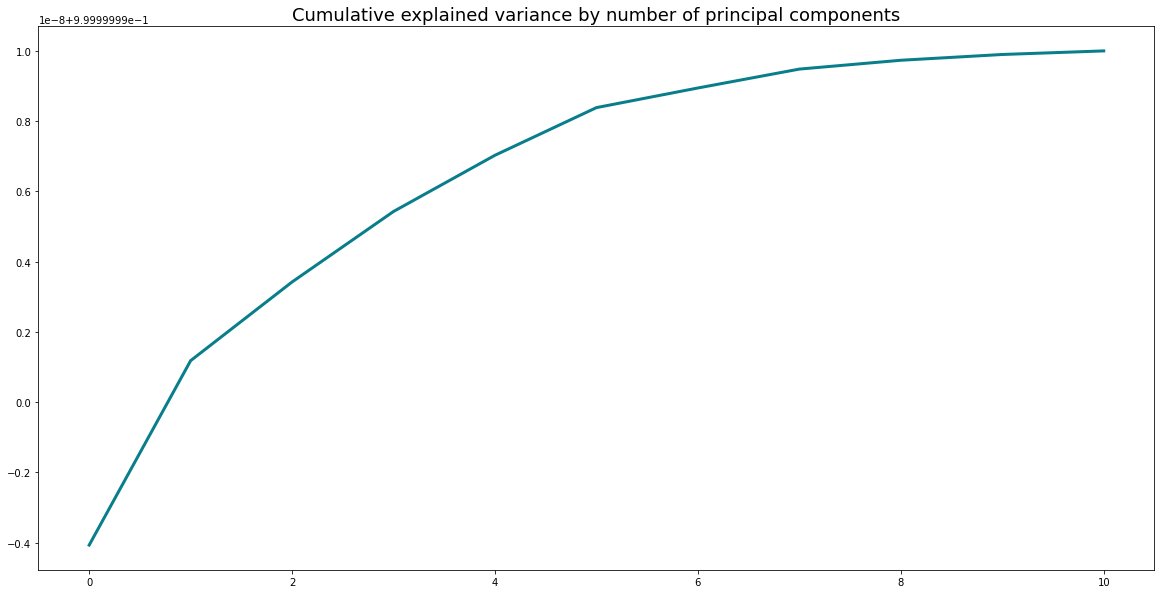

In [68]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components',
          size=18)
plt.show()

We can see that, with the first 7 principal components, we get almost the 90% of variance of the data. Hence, now we are going to transform the data to the projection of these 7 components and see the new performance of the models.

In [69]:
PCA_TO_REDUCE = PCA(n_components=7)
X_reduced_pca = PCA_TO_REDUCE.fit_transform(X)

In [70]:
PCA_TO_REDUCE = PCA(n_components=7)
X_balanced_reduced_pca = PCA_TO_REDUCE.fit_transform(X_balanced)

# Final models

## Random Forest

### Unbalanced

In [71]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, 
                             min_samples_split=2, random_state=0)

y_pred = cross_val_predict(clf, X_reduced_pca, y, cv=5)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y,y_pred),
                                   recall_score(y, y_pred),
                                   precision_score(y, y_pred)))

Accuracy score: 0.949119373776908
Recall score: 0.008032128514056224
Precision score: 0.13333333333333333


In [72]:
conf_matrix = confusion_matrix(y, y_pred)
annotated_confusion_matrix(conf_matrix)

### Balanced

In [73]:
# As in our previous balance, but this time with PCA

X_reduced_pca_balanced = PCA_TO_REDUCE.fit_transform(X_balanced)

In [74]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, 
                             min_samples_split=2, random_state=0)
y_pred = cross_val_predict(clf, X_reduced_pca_balanced, y_balanced, cv=5)

print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y_balanced,y_pred),
                                   recall_score(y_balanced, y_pred),
                                   precision_score(y_balanced, y_pred)))

Accuracy score: 0.7008032128514057
Recall score: 0.6746987951807228
Precision score: 0.711864406779661


In [75]:
conf_matrix = confusion_matrix(y_balanced, y_pred)
annotated_confusion_matrix(conf_matrix)

##SVM

### Unbalanced

In [76]:
model = SVC(kernel='poly')
kf = KFold(n_splits=10, shuffle=True)

y_pred = cross_val_predict(model, X_reduced_pca, y, cv=kf)

print("SVM with cross validations, reduced PCA and unbalanced\n" 
      "Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y,y_pred),
                                   recall_score(y, y_pred),
                                   precision_score(y, y_pred)))


SVM with cross validations, reduced PCA and unbalanced
Accuracy score: 0.9512720156555773
Recall score: 0.0
Precision score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [77]:
conf_matrix = confusion_matrix(y, y_pred)
annotated_confusion_matrix(conf_matrix)

### Balanced

In [78]:
model = SVC(kernel='poly')
kf = KFold(n_splits=10, shuffle=True)

y_pred = cross_val_predict(model, X_reduced_pca_balanced, y_balanced, cv=kf)
print("Accuracy score: {}\nRecall score: {}\n"
      "Precision score: {}".format(accuracy_score(y_balanced,y_pred),
                                   recall_score(y_balanced, y_pred),
                                   precision_score(y_balanced, y_pred)))


Accuracy score: 0.4919678714859438
Recall score: 0.30522088353413657
Precision score: 0.48717948717948717


In [79]:
conf_matrix = confusion_matrix(y_balanced, y_pred)
annotated_confusion_matrix(conf_matrix)

## ANN reduced

###Unbalanced


In [80]:
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced_pca, y)

In [81]:
model = Sequential(
    [LayerNormalization(),
    Dense(7, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

In [82]:
epochs=10

hist=model.fit(X_reduced_train, y_reduced_train, epochs=epochs, batch_size=128)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.8158 - accuracy: 0.2054 - recall: 0.8158 - precision: 0.0490
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4890 - recall: 0.4895 - precision: 0.0476
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.9366 - recall: 0.0263 - precision: 0.0794
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.9502 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.9504 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.9504 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.9504 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 8/10
30/30 [=====

In [83]:
history = pd.DataFrame(
    {
        'epoch' : np.linspace(1,10,num=epochs),
        'loss' : hist.history['loss']
    }
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_2 (Layer (None, 7)                 14        
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [84]:
fig = px.line(history,x='epoch', y='loss', title='Loss over epochs')
fig.show()

In [85]:
hist = model.evaluate(X_reduced_test, y_reduced_test, batch_size=64, verbose=2)

20/20 - 0s - loss: 0.3547 - accuracy: 0.9538 - recall: 0.0000e+00 - precision: 0.0000e+00


In [86]:
y_pred = np.argmax(model.predict(X_reduced_test, batch_size=64), axis=-1)
conf_matrix=confusion_matrix(y_reduced_test,y_pred)
annotated_confusion_matrix(conf_matrix)

###Balanced


In [87]:
X_balanced_reduced_train, X_balanced_reduced_test, y_balanced_reduced_train, y_balanced_reduced_test = train_test_split(X_balanced_reduced_pca, y_balanced)

In [88]:
model = Sequential(
    [LayerNormalization(),
    Dense(7, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

In [89]:
epochs=10

hist=model.fit(X_balanced_reduced_train, y_balanced_reduced_train, epochs=epochs, batch_size=128)

Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 0.6901 - accuracy: 0.5496 - recall: 0.5699 - precision: 0.5641
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5496 - recall: 0.5699 - precision: 0.5641
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5523 - recall: 0.5699 - precision: 0.5670
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5523 - recall: 0.5699 - precision: 0.5670
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5523 - recall: 0.5699 - precision: 0.5670
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5523 - recall: 0.5699 - precision: 0.5670
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5523 - recall: 0.5699 - precision: 0.5670
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss:

In [90]:
history = pd.DataFrame(
    {
        'epoch' : np.linspace(1,10,num=epochs),
        'loss' : hist.history['loss']
    }
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_3 (Layer (None, 7)                 14        
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [91]:
fig = px.line(history,x='epoch', y='loss', title='Loss over epochs')
fig.show()

In [92]:
hist = model.evaluate(X_balanced_reduced_test, y_balanced_reduced_test, batch_size=64, verbose=2)

2/2 - 0s - loss: 0.6983 - accuracy: 0.5200 - recall: 0.4107 - precision: 0.4600


In [93]:
y_pred = np.argmax(model.predict(X_balanced_reduced_test, batch_size=64), axis=-1)
conf_matrix=confusion_matrix(y_balanced_reduced_test,y_pred)
annotated_confusion_matrix(conf_matrix)